In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
warnings.filterwarnings('ignore')
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer
warnings.filterwarnings("ignore", category=DeprecationWarning)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\sakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt 

In [2]:
data = pd.read_csv('Resume.csv')

In [3]:
data

,Resumes,Category
0,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer Resume
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
2,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume
3,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume
4,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume
...,...,...
74,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday Resume
75,Name\t: Naresh Babu Cherukuri\n\n\n\nObjective...,Workday Resume
76,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,Workday Resume
77,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday Resume


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   79 non-null     object
 1   Category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [5]:
data.isnull().sum()

Resumes     0
Category    0
dtype: int64

In [6]:
data.duplicated().sum()

0

### Checking unnecessary words in the data

In [7]:
data.Resumes.str.contains('https://').value_counts() / len(data)

False    0.911392
True     0.088608
Name: Resumes, dtype: float64

In [8]:
data.Resumes.str.contains('@').value_counts() / len(data)

False    0.962025
True     0.037975
Name: Resumes, dtype: float64

In [9]:
print('Total Resumes this period:', len(data.index), '\n')

Total Resumes this period: 79 



In [10]:
category = data['Category'].value_counts().reset_index()
category

,index,Category
0,React JS Developer Resume,24
1,Workday Resume,21
2,PeopleSoft resume,20
3,SQL Developer Lightning Insight Resume,14


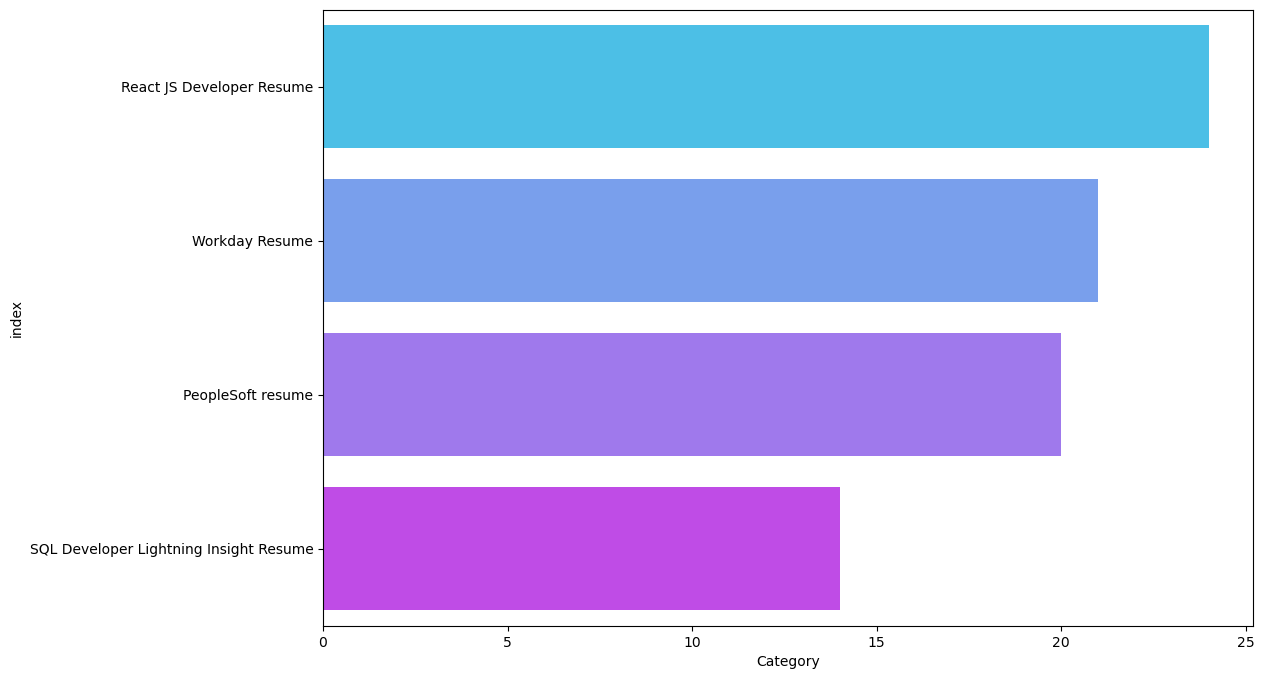

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(x=category['Category'], y=category['index'], palette='cool')
plt.show()

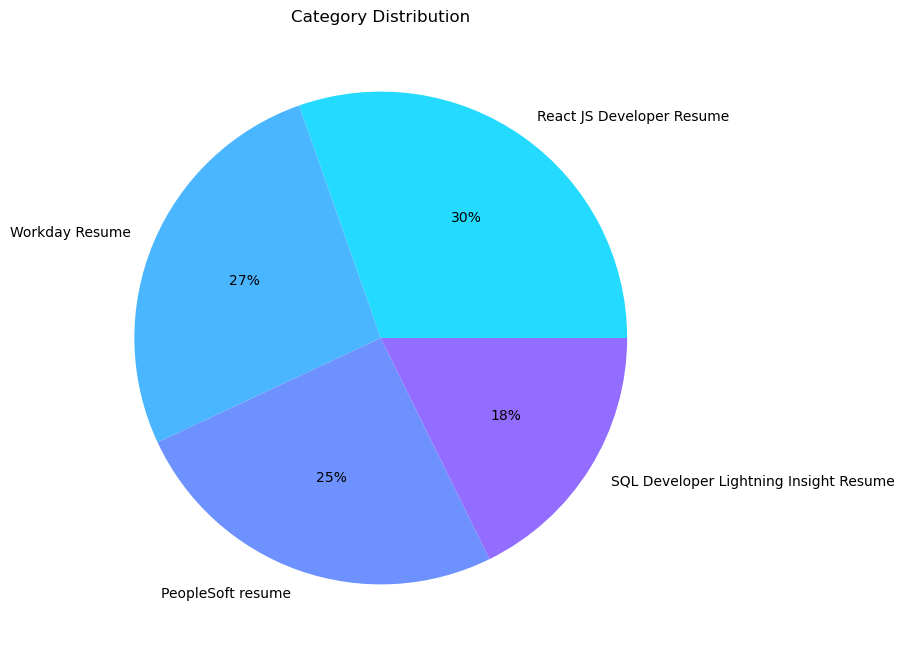

In [12]:
plt.figure(figsize=(12,8))
plt.pie(category['Category'], labels=category['index'],
        colors=sns.color_palette('cool'), autopct='%.0f%%')
plt.title('Category Distribution')
plt.show()    

### Tokenization

In [13]:
from nltk import word_tokenize
tokens = data.Resumes.map(word_tokenize)

In [14]:
data=[Text.strip() for Text in data.Resumes] # remove both the leading and the trailing characters
data=[Text for Text in data if Text] # removes empty strings, because they are considered in Python as False
data[0:10]

['FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n\nPavas Goswami\n\nFULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n\nPavas Goswami\n\n\n\n\n\nPROFILE\n\nSearching for the opportunity to bring 3+ years of experience with software developing, technology engineering, designing, and maintenance to cater to the specific needs of the people with critical thinking, problem-solving, and leadership.\n\n\nCORE SKILLS AND PROGRAMMING LANGUAGES\n\n\n\n\t  JAVA\t                                                                JAVASCRIPT\t                                                         MySQL\t\n\nSPRING BOOT\n\n\n\n\n\n\n\n\nREACT.JS ANGULAR\n\nCSS3/Bootstrap HTML5\n\n\n\nPERSONAL DETAILS\n\nBirth date\n\n05-APR-1991\n\nNationality\n\nINDIAN\n\nAddress\n\n\n  Node.js\n\n\n\n  MICROSERVICES\n\n\n\n\n\nWORK EXPERIENCE\n\n\n\nSoftware Engineer\n\nBRAINO SERVICES, NEW DELHI\n\n\n   MongoDB AWS/AZURE\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nFeb 2019-PRESENT\n\n\n\nKailash Nagar, Vrindavan, UP-281121\n\n\n\nCON

In [15]:
review_text=' '.join(data)
review_text[:1000]

'FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n\nPavas Goswami\n\nFULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n\nPavas Goswami\n\n\n\n\n\nPROFILE\n\nSearching for the opportunity to bring 3+ years of experience with software developing, technology engineering, designing, and maintenance to cater to the specific needs of the people with critical thinking, problem-solving, and leadership.\n\n\nCORE SKILLS AND PROGRAMMING LANGUAGES\n\n\n\n\t  JAVA\t                                                                JAVASCRIPT\t                                                         MySQL\t\n\nSPRING BOOT\n\n\n\n\n\n\n\n\nREACT.JS ANGULAR\n\nCSS3/Bootstrap HTML5\n\n\n\nPERSONAL DETAILS\n\nBirth date\n\n05-APR-1991\n\nNationality\n\nINDIAN\n\nAddress\n\n\n  Node.js\n\n\n\n  MICROSERVICES\n\n\n\n\n\nWORK EXPERIENCE\n\n\n\nSoftware Engineer\n\nBRAINO SERVICES, NEW DELHI\n\n\n   MongoDB AWS/AZURE\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nFeb 2019-PRESENT\n\n\n\nKailash Nagar, Vrindavan, UP-281121\n\n\n\nCONT

In [16]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
review_tokens=tknzr.tokenize(review_text)
print(review_tokens[:100])

['FULLSTACK', 'SOFTWARE', 'DEVELOPER', '/', 'WEB', 'DEVELOPER', 'Pavas', 'Goswami', 'FULLSTACK', 'SOFTWARE', 'DEVELOPER', '/', 'WEB', 'DEVELOPER', 'Pavas', 'Goswami', 'PROFILE', 'Searching', 'for', 'the', 'opportunity', 'to', 'bring', '3', '+', 'years', 'of', 'experience', 'with', 'software', 'developing', ',', 'technology', 'engineering', ',', 'designing', ',', 'and', 'maintenance', 'to', 'cater', 'to', 'the', 'specific', 'needs', 'of', 'the', 'people', 'with', 'critical', 'thinking', ',', 'problem-solving', ',', 'and', 'leadership', '.', 'CORE', 'SKILLS', 'AND', 'PROGRAMMING', 'LANGUAGES', 'JAVA', 'JAVASCRIPT', 'MySQL', 'SPRING', 'BOOT', 'REACT.JS', 'ANGULAR', 'CSS', '3', '/', 'Bootstrap', 'HTML', '5', 'PERSONAL', 'DETAILS', 'Birth', 'date', '05', '-', 'APR', '-', '1991', 'Nationality', 'INDIAN', 'Address', 'Node.js', 'MICROSERVICES', 'WORK', 'EXPERIENCE', 'Software', 'Engineer', 'BRAINO', 'SERVICES', ',', 'NEW', 'DELHI', 'MongoDB', 'AWS']


In [17]:
review_tokens_text=' '.join(review_tokens)
review_tokens_text[:1000]

'FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER Pavas Goswami FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER Pavas Goswami PROFILE Searching for the opportunity to bring 3 + years of experience with software developing , technology engineering , designing , and maintenance to cater to the specific needs of the people with critical thinking , problem-solving , and leadership . CORE SKILLS AND PROGRAMMING LANGUAGES JAVA JAVASCRIPT MySQL SPRING BOOT REACT.JS ANGULAR CSS 3 / Bootstrap HTML 5 PERSONAL DETAILS Birth date 05 - APR - 1991 Nationality INDIAN Address Node.js MICROSERVICES WORK EXPERIENCE Software Engineer BRAINO SERVICES , NEW DELHI MongoDB AWS / AZURE Feb 2019 - PRESENT Kailash Nagar , Vrindavan , UP - 281121 CONTACT Report iCredit System : In this project there is multiple data stream that keeps on dumping data in our Oracle database . These are the financial data from different sources . Our responsibility is to capture data from the oracle database , apply the business rules , a

### Remove Punctuations from Text

In [18]:
no_punc_text=review_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:1000]

'FULLSTACK SOFTWARE DEVELOPER  WEB DEVELOPER Pavas Goswami FULLSTACK SOFTWARE DEVELOPER  WEB DEVELOPER Pavas Goswami PROFILE Searching for the opportunity to bring 3  years of experience with software developing  technology engineering  designing  and maintenance to cater to the specific needs of the people with critical thinking  problemsolving  and leadership  CORE SKILLS AND PROGRAMMING LANGUAGES JAVA JAVASCRIPT MySQL SPRING BOOT REACTJS ANGULAR CSS 3  Bootstrap HTML 5 PERSONAL DETAILS Birth date 05  APR  1991 Nationality INDIAN Address Nodejs MICROSERVICES WORK EXPERIENCE Software Engineer BRAINO SERVICES  NEW DELHI MongoDB AWS  AZURE Feb 2019  PRESENT Kailash Nagar  Vrindavan  UP  281121 CONTACT Report iCredit System  In this project there is multiple data stream that keeps on dumping data in our Oracle database  These are the financial data from different sources  Our responsibility is to capture data from the oracle database  apply the business rules  and further expose them to 

### Remove URL'S from Text

In [19]:
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text[:1000]

'FULLSTACK SOFTWARE DEVELOPER  WEB DEVELOPER Pavas Goswami FULLSTACK SOFTWARE DEVELOPER  WEB DEVELOPER Pavas Goswami PROFILE Searching for the opportunity to bring 3  years of experience with software developing  technology engineering  designing  and maintenance to cater to the specific needs of the people with critical thinking  problemsolving  and leadership  CORE SKILLS AND PROGRAMMING LANGUAGES JAVA JAVASCRIPT MySQL SPRING BOOT REACTJS ANGULAR CSS 3  Bootstrap HTML 5 PERSONAL DETAILS Birth date 05  APR  1991 Nationality INDIAN Address Nodejs MICROSERVICES WORK EXPERIENCE Software Engineer BRAINO SERVICES  NEW DELHI MongoDB AWS  AZURE Feb 2019  PRESENT Kailash Nagar  Vrindavan  UP  281121 CONTACT Report iCredit System  In this project there is multiple data stream that keeps on dumping data in our Oracle database  These are the financial data from different sources  Our responsibility is to capture data from the oracle database  apply the business rules  and further expose them to 

### Apply Tokenization on 100 Words

In [20]:
import nltk.data
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens[:100])

['FULLSTACK', 'SOFTWARE', 'DEVELOPER', 'WEB', 'DEVELOPER', 'Pavas', 'Goswami', 'FULLSTACK', 'SOFTWARE', 'DEVELOPER', 'WEB', 'DEVELOPER', 'Pavas', 'Goswami', 'PROFILE', 'Searching', 'for', 'the', 'opportunity', 'to', 'bring', '3', 'years', 'of', 'experience', 'with', 'software', 'developing', 'technology', 'engineering', 'designing', 'and', 'maintenance', 'to', 'cater', 'to', 'the', 'specific', 'needs', 'of', 'the', 'people', 'with', 'critical', 'thinking', 'problemsolving', 'and', 'leadership', 'CORE', 'SKILLS', 'AND', 'PROGRAMMING', 'LANGUAGES', 'JAVA', 'JAVASCRIPT', 'MySQL', 'SPRING', 'BOOT', 'REACTJS', 'ANGULAR', 'CSS', '3', 'Bootstrap', 'HTML', '5', 'PERSONAL', 'DETAILS', 'Birth', 'date', '05', 'APR', '1991', 'Nationality', 'INDIAN', 'Address', 'Nodejs', 'MICROSERVICES', 'WORK', 'EXPERIENCE', 'Software', 'Engineer', 'BRAINO', 'SERVICES', 'NEW', 'DELHI', 'MongoDB', 'AWS', 'AZURE', 'Feb', '2019', 'PRESENT', 'Kailash', 'Nagar', 'Vrindavan', 'UP', '281121', 'CONTACT', 'Report', 'iCredi

In [21]:
len(text_tokens)

57256

### Removing Stopwords

In [22]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:100])

['FULLSTACK', 'SOFTWARE', 'DEVELOPER', 'WEB', 'DEVELOPER', 'Pavas', 'Goswami', 'FULLSTACK', 'SOFTWARE', 'DEVELOPER', 'WEB', 'DEVELOPER', 'Pavas', 'Goswami', 'PROFILE', 'Searching', 'opportunity', 'bring', '3', 'years', 'experience', 'software', 'developing', 'technology', 'engineering', 'designing', 'maintenance', 'cater', 'specific', 'needs', 'people', 'critical', 'thinking', 'problemsolving', 'leadership', 'CORE', 'SKILLS', 'AND', 'PROGRAMMING', 'LANGUAGES', 'JAVA', 'JAVASCRIPT', 'MySQL', 'SPRING', 'BOOT', 'REACTJS', 'ANGULAR', 'CSS', '3', 'Bootstrap', 'HTML', '5', 'PERSONAL', 'DETAILS', 'Birth', 'date', '05', 'APR', '1991', 'Nationality', 'INDIAN', 'Address', 'Nodejs', 'MICROSERVICES', 'WORK', 'EXPERIENCE', 'Software', 'Engineer', 'BRAINO', 'SERVICES', 'NEW', 'DELHI', 'MongoDB', 'AWS', 'AZURE', 'Feb', '2019', 'PRESENT', 'Kailash', 'Nagar', 'Vrindavan', 'UP', '281121', 'CONTACT', 'Report', 'iCredit', 'System', 'In', 'project', 'multiple', 'data', 'stream', 'keeps', 'dumping', 'data',

In [23]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[:100])

['fullstack', 'software', 'developer', 'web', 'developer', 'pavas', 'goswami', 'fullstack', 'software', 'developer', 'web', 'developer', 'pavas', 'goswami', 'profile', 'searching', 'opportunity', 'bring', '3', 'years', 'experience', 'software', 'developing', 'technology', 'engineering', 'designing', 'maintenance', 'cater', 'specific', 'needs', 'people', 'critical', 'thinking', 'problemsolving', 'leadership', 'core', 'skills', 'and', 'programming', 'languages', 'java', 'javascript', 'mysql', 'spring', 'boot', 'reactjs', 'angular', 'css', '3', 'bootstrap', 'html', '5', 'personal', 'details', 'birth', 'date', '05', 'apr', '1991', 'nationality', 'indian', 'address', 'nodejs', 'microservices', 'work', 'experience', 'software', 'engineer', 'braino', 'services', 'new', 'delhi', 'mongodb', 'aws', 'azure', 'feb', '2019', 'present', 'kailash', 'nagar', 'vrindavan', 'up', '281121', 'contact', 'report', 'icredit', 'system', 'in', 'project', 'multiple', 'data', 'stream', 'keeps', 'dumping', 'data',

### Applying Stemming

In [24]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[:100])

['fullstack', 'softwar', 'develop', 'web', 'develop', 'pava', 'goswami', 'fullstack', 'softwar', 'develop', 'web', 'develop', 'pava', 'goswami', 'profil', 'search', 'opportun', 'bring', '3', 'year', 'experi', 'softwar', 'develop', 'technolog', 'engin', 'design', 'mainten', 'cater', 'specif', 'need', 'peopl', 'critic', 'think', 'problemsolv', 'leadership', 'core', 'skill', 'and', 'program', 'languag', 'java', 'javascript', 'mysql', 'spring', 'boot', 'reactj', 'angular', 'css', '3', 'bootstrap', 'html', '5', 'person', 'detail', 'birth', 'date', '05', 'apr', '1991', 'nation', 'indian', 'address', 'nodej', 'microservic', 'work', 'experi', 'softwar', 'engin', 'braino', 'servic', 'new', 'delhi', 'mongodb', 'aw', 'azur', 'feb', '2019', 'present', 'kailash', 'nagar', 'vrindavan', 'up', '281121', 'contact', 'report', 'icredit', 'system', 'in', 'project', 'multipl', 'data', 'stream', 'keep', 'dump', 'data', 'oracl', 'databas', 'these', 'financi', 'data']


In [25]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc[:100])

fullstack software developer web developer pavas goswami fullstack software developer web developer pavas goswami profile searching opportunity bring 3 years experience software developing technology engineering designing maintenance cater specific needs people critical thinking problemsolving leadership core skills and programming languages java javascript mysql spring boot reactjs angular css 3 bootstrap html 5 personal details birth date 05 apr 1991 nationality indian address nodejs microservices work experience software engineer braino services new delhi mongodb aws azure feb 2019 present kailash nagar vrindavan up 281121 contact report icredit system in project multiple data stream keeps dumping data oracle database these financial data


### Applying Lemmentization

In [26]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[:100])

['fullstack', 'software', 'developer', 'web', 'developer', 'pavas', 'goswami', 'fullstack', 'software', 'developer', 'web', 'developer', 'pavas', 'goswami', 'profile', 'search', 'opportunity', 'bring', '3', 'year', 'experience', 'software', 'develop', 'technology', 'engineering', 'designing', 'maintenance', 'cater', 'specific', 'need', 'people', 'critical', 'thinking', 'problemsolving', 'leadership', 'core', 'skill', 'and', 'programming', 'language', 'java', 'javascript', 'mysql', 'spring', 'boot', 'reactjs', 'angular', 'css', '3', 'bootstrap', 'html', '5', 'personal', 'detail', 'birth', 'date', '05', 'apr', '1991', 'nationality', 'indian', 'address', 'nodejs', 'microservice', 'work', 'experience', 'software', 'engineer', 'braino', 'service', 'new', 'delhi', 'mongodb', 'aw', 'azure', 'feb', '2019', 'present', 'kailash', 'nagar', 'vrindavan', 'up', '281121', 'contact', 'report', 'icredit', 'system', 'in', 'project', 'multiple', 'datum', 'stream', 'keep', 'dump', 'datum', 'oracle', 'data

### Applying Text Processing On DataFrame

In [27]:
data = pd.read_csv("Resume.csv")

In [28]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

### Converting Into Clean Resumes

In [29]:
data['Clean_Resumes'] = np.vectorize(remove_pattern)(data['Resumes'], "@[\w]*")
data.head(10)

,Resumes,Category,Clean_Resumes
0,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer Resume,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...
2,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...
3,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...
4,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...
5,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer Resume,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...
6,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...
7,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...
8,CURRICULUM VITAE\n\n\n\n\n\n\n\nAnjani Priyada...,React JS Developer Resume,CURRICULUM VITAE\n\n\n\n\n\n\n\nAnjani Priyada...
9,Maryala Vinay Reddy\n\n\n\n\tProfessional Summ...,React JS Developer Resume,Maryala Vinay Reddy\n\n\n\n\tProfessional Summ...


### Remove Url from Clean_Resumes

In [30]:
clean_Resumes = []

for index, row in data.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Resumes.split() if 'http' not in word]
    clean_Resumes.append(' '.join(words_without_links))

data['Clean_Resumes'] = clean_Resumes
data.head(10)

,Resumes,Category,Clean_Resumes
0,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer Resume,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER P...
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
2,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,Pranish Sonone Career summary: Experience of 1...
3,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,Ranga Gaganam Professional Summary: Profession...
4,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,SHAIK ABDUL SHARUK 2 years’ Experience in Wipr...
5,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer Resume,Name: M. Prabakaran Title: UI Developer PROFES...
6,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
7,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
8,CURRICULUM VITAE\n\n\n\n\n\n\n\nAnjani Priyada...,React JS Developer Resume,CURRICULUM VITAE Anjani Priyadarshini Sr. Web ...
9,Maryala Vinay Reddy\n\n\n\n\tProfessional Summ...,React JS Developer Resume,Maryala Vinay Reddy Professional Summary: Havi...


### Remove '!' from Clean_Resumes

In [31]:
data = data[data['Clean_Resumes']!='']
data.head(10)

,Resumes,Category,Clean_Resumes
0,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer Resume,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER P...
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
2,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,Pranish Sonone Career summary: Experience of 1...
3,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,Ranga Gaganam Professional Summary: Profession...
4,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,SHAIK ABDUL SHARUK 2 years’ Experience in Wipr...
5,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer Resume,Name: M. Prabakaran Title: UI Developer PROFES...
6,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
7,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
8,CURRICULUM VITAE\n\n\n\n\n\n\n\nAnjani Priyada...,React JS Developer Resume,CURRICULUM VITAE Anjani Priyadarshini Sr. Web ...
9,Maryala Vinay Reddy\n\n\n\n\tProfessional Summ...,React JS Developer Resume,Maryala Vinay Reddy Professional Summary: Havi...


### Removing Duplicate Resumes

In [32]:
data.drop_duplicates(subset=['Clean_Resumes'], keep=False)
data.head(10)

,Resumes,Category,Clean_Resumes
0,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer Resume,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER P...
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
2,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,Pranish Sonone Career summary: Experience of 1...
3,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,Ranga Gaganam Professional Summary: Profession...
4,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,SHAIK ABDUL SHARUK 2 years’ Experience in Wipr...
5,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer Resume,Name: M. Prabakaran Title: UI Developer PROFES...
6,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
7,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
8,CURRICULUM VITAE\n\n\n\n\n\n\n\nAnjani Priyada...,React JS Developer Resume,CURRICULUM VITAE Anjani Priyadarshini Sr. Web ...
9,Maryala Vinay Reddy\n\n\n\n\tProfessional Summ...,React JS Developer Resume,Maryala Vinay Reddy Professional Summary: Havi...


In [33]:
data = data.reset_index(drop=True)
data.head(10)

,Resumes,Category,Clean_Resumes
0,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer Resume,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER P...
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
2,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,Pranish Sonone Career summary: Experience of 1...
3,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,Ranga Gaganam Professional Summary: Profession...
4,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,SHAIK ABDUL SHARUK 2 years’ Experience in Wipr...
5,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer Resume,Name: M. Prabakaran Title: UI Developer PROFES...
6,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
7,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
8,CURRICULUM VITAE\n\n\n\n\n\n\n\nAnjani Priyada...,React JS Developer Resume,CURRICULUM VITAE Anjani Priyadarshini Sr. Web ...
9,Maryala Vinay Reddy\n\n\n\n\tProfessional Summ...,React JS Developer Resume,Maryala Vinay Reddy Professional Summary: Havi...


### Cleaning words from Text

In [34]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('!', '',text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('⇨', '',text)
    text = re.sub(':', '',text)
    text = re.sub('•', '',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [35]:
data['Clean_Resumes'] = data['Clean_Resumes'].apply(lambda x: clean_text(x))
data.head(10)

,Resumes,Category,Clean_Resumes
0,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer Resume,fullstack software developer web developer pa...
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...
2,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,pranish sonone career summary experience of y...
3,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,ranga gaganam professional summary professiona...
4,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,shaik abdul sharuk years’ experience in wipro...
5,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer Resume,name m prabakaran title ui developer professio...
6,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,mareedu lokesh babu professional overview arou...
7,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,mareedu lokesh babu professional overview arou...
8,CURRICULUM VITAE\n\n\n\n\n\n\n\nAnjani Priyada...,React JS Developer Resume,curriculum vitae anjani priyadarshini sr web d...
9,Maryala Vinay Reddy\n\n\n\n\tProfessional Summ...,React JS Developer Resume,maryala vinay reddy professional summary havin...


### Removing Emogi from clean resumes

In [36]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [37]:
data['Clean_Resumes']=data['Clean_Resumes'].apply(lambda x: remove_emoji(x))
data.head(10)

,Resumes,Category,Clean_Resumes
0,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer Resume,fullstack software developer web developer pa...
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...
2,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,pranish sonone career summary experience of y...
3,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,ranga gaganam professional summary professiona...
4,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,shaik abdul sharuk years’ experience in wipro...
5,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer Resume,name m prabakaran title ui developer professio...
6,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,mareedu lokesh babu professional overview arou...
7,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,mareedu lokesh babu professional overview arou...
8,CURRICULUM VITAE\n\n\n\n\n\n\n\nAnjani Priyada...,React JS Developer Resume,curriculum vitae anjani priyadarshini sr web d...
9,Maryala Vinay Reddy\n\n\n\n\tProfessional Summ...,React JS Developer Resume,maryala vinay reddy professional summary havin...


### Applying Tokenization on clean resumes

In [38]:
data['Tokenized_Resumes'] = data['Clean_Resumes'].apply(lambda x: nltk.word_tokenize(x))
data.head(10)

,Resumes,Category,Clean_Resumes,Tokenized_Resumes
0,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer Resume,fullstack software developer web developer pa...,"[fullstack, software, developer, web, develope..."
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...,"[md, khizaruddin, rauf, experience, currently,..."
2,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,pranish sonone career summary experience of y...,"[pranish, sonone, career, summary, experience,..."
3,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,ranga gaganam professional summary professiona...,"[ranga, gaganam, professional, summary, profes..."
4,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,shaik abdul sharuk years’ experience in wipro...,"[shaik, abdul, sharuk, years, ’, experience, i..."
5,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer Resume,name m prabakaran title ui developer professio...,"[name, m, prabakaran, title, ui, developer, pr..."
6,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,mareedu lokesh babu professional overview arou...,"[mareedu, lokesh, babu, professional, overview..."
7,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,mareedu lokesh babu professional overview arou...,"[mareedu, lokesh, babu, professional, overview..."
8,CURRICULUM VITAE\n\n\n\n\n\n\n\nAnjani Priyada...,React JS Developer Resume,curriculum vitae anjani priyadarshini sr web d...,"[curriculum, vitae, anjani, priyadarshini, sr,..."
9,Maryala Vinay Reddy\n\n\n\n\tProfessional Summ...,React JS Developer Resume,maryala vinay reddy professional summary havin...,"[maryala, vinay, reddy, professional, summary,..."


In [39]:
data.drop(['Tokenized_Resumes'],axis=1,inplace=True)

### Removing stop words from Clean_Resumes and Making it Absolutely_Clean_Resumes

In [40]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

cleaned_resumes = []

for index, row in data.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Resumes.split()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_resumes.append(' '.join(words_without_stopwords))
    
data['Absolute_Clean_Resumes'] = cleaned_resumes
data.head(10)

,Resumes,Category,Clean_Resumes,Absolute_Clean_Resumes
0,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer Resume,fullstack software developer web developer pa...,fullstack software developer web developer pav...
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...,md khizaruddin rauf experience currently worki...
2,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,pranish sonone career summary experience of y...,pranish sonone career summary experience of ye...
3,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,ranga gaganam professional summary professiona...,ranga gaganam professional summary professiona...
4,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,shaik abdul sharuk years’ experience in wipro...,shaik abdul sharuk years’ experience in wipro ...
5,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer Resume,name m prabakaran title ui developer professio...,name m prabakaran title ui developer professio...
6,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,mareedu lokesh babu professional overview arou...,mareedu lokesh babu professional overview arou...
7,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,mareedu lokesh babu professional overview arou...,mareedu lokesh babu professional overview arou...
8,CURRICULUM VITAE\n\n\n\n\n\n\n\nAnjani Priyada...,React JS Developer Resume,curriculum vitae anjani priyadarshini sr web d...,curriculum vitae anjani priyadarshini sr web d...
9,Maryala Vinay Reddy\n\n\n\n\tProfessional Summ...,React JS Developer Resume,maryala vinay reddy professional summary havin...,maryala vinay reddy professional summary havin...


In [41]:
Tokenized_Resume = data['Absolute_Clean_Resumes'].apply(lambda x: x.split())
Tokenized_Resume.head(10)

0    [fullstack, software, developer, web, develope...
1    [md, khizaruddin, rauf, experience, currently,...
2    [pranish, sonone, career, summary, experience,...
3    [ranga, gaganam, professional, summary, profes...
4    [shaik, abdul, sharuk, years’, experience, in,...
5    [name, m, prabakaran, title, ui, developer, pr...
6    [mareedu, lokesh, babu, professional, overview...
7    [mareedu, lokesh, babu, professional, overview...
8    [curriculum, vitae, anjani, priyadarshini, sr,...
9    [maryala, vinay, reddy, professional, summary,...
Name: Absolute_Clean_Resumes, dtype: object

### Applying Lemmatization on Abosulte_Clean_Resumes

In [42]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

Tokenized_Resumes = Tokenized_Resume.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
Tokenized_Resumes.head(10)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    [fullstack, software, developer, web, develope...
1    [md, khizaruddin, rauf, experience, currently,...
2    [pranish, sonone, career, summary, experience,...
3    [ranga, gaganam, professional, summary, profes...
4    [shaik, abdul, sharuk, years’, experience, in,...
5    [name, m, prabakaran, title, ui, developer, pr...
6    [mareedu, lokesh, babu, professional, overview...
7    [mareedu, lokesh, babu, professional, overview...
8    [curriculum, vitae, anjani, priyadarshini, sr,...
9    [maryala, vinay, reddy, professional, summary,...
Name: Absolute_Clean_Resumes, dtype: object

In [43]:
for i, tokens in enumerate(Tokenized_Resume):
    Tokenized_Resume[i] = ' '.join(tokens)

data['Absolute_Clean_Resumes'] = Tokenized_Resume
data.head(10)

,Resumes,Category,Clean_Resumes,Absolute_Clean_Resumes
0,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer Resume,fullstack software developer web developer pa...,fullstack software developer web developer pav...
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...,md khizaruddin rauf experience currently worki...
2,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,pranish sonone career summary experience of y...,pranish sonone career summary experience of ye...
3,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,ranga gaganam professional summary professiona...,ranga gaganam professional summary professiona...
4,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,shaik abdul sharuk years’ experience in wipro...,shaik abdul sharuk years’ experience in wipro ...
5,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer Resume,name m prabakaran title ui developer professio...,name m prabakaran title ui developer professio...
6,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,mareedu lokesh babu professional overview arou...,mareedu lokesh babu professional overview arou...
7,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,mareedu lokesh babu professional overview arou...,mareedu lokesh babu professional overview arou...
8,CURRICULUM VITAE\n\n\n\n\n\n\n\nAnjani Priyada...,React JS Developer Resume,curriculum vitae anjani priyadarshini sr web d...,curriculum vitae anjani priyadarshini sr web d...
9,Maryala Vinay Reddy\n\n\n\n\tProfessional Summ...,React JS Developer Resume,maryala vinay reddy professional summary havin...,maryala vinay reddy professional summary havin...


### Applying Count Vectorizer

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
review_cv=cv.fit_transform(lemmas)

In [45]:
print(cv.get_feature_names()[100:2000])

['1998', '1999', '19th', '1st', '20', '200', '2000', '20002003', '2001', '200112014', '2002', '2003', '20032008', '2004', '2005', '2006', '2007', '20072008', '2008', '20082012', '2008r2', '2009', '20092011', '20092013', '2010', '2011', '20112013', '20112015', '2012', '20122014', '20122016', '2012r2', '2013', '20132017', '2014', '20142012', '20142016', '20142017', '2015', '20152017', '2016', '20162012', '2016r2', '2017', '20172019', '201784006', '2018', '2019', '2019to', '2020', '2021', '2022', '204', '21', '210', '211', '22', '2203', '2208', '22nd', '23', '2301', '24', '247', '25', '25th', '26', '2601', '2627', '26387', '2705', '2728', '27th', '28', '281121', '2930', '2k15', '2k16', '2k18', '30', '300', '3015', '3031', '30th', '31', '310', '312', '32', '3233', '33', '34', '35', '36', '360', '364445', '365', '37', '38', '39', '3year', '401', '401k', '41', '411', '42', '43', '44', '46', '49600', '498', '50', '500090', '508', '51', '518', '52', '5267', '528', '53', '5312', '538', '53854',

In [46]:
print(review_cv.toarray()[100:2000])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [47]:
print(review_cv.toarray().shape)

(44625, 4340)


### Applying Count vectorizer on NGrams

In [48]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=4000)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [49]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['006', '01', '012019', '0144b', '016', '017', '022019', '032', '032012', '032014', '032018', '032019', '032020', '032021', '04', '0411', '042019', '042021', '04th', '05', '0509', '052015', '052018', '052021', '05th', '06', '062019', '06th', '07', '072017', '07th', '08', '082011', '082012', '082014', '082018', '082020', '09', '092015', '092020', '10', '100', '1011', '1013', '102', '103', '104236', '106', '109', '10gr2', '10gr3', '10gr3and', '10th', '11', '1109', '112', '112013', '1131', '11gr2', '11i', '11th', '12', '121', '122', '122020', '12c', '12cr1', '12cr2', '12th', '13', '13000', '14', '15', '1502', '1508', '157', '16', '16698139', '17', '1713', '17329', '18', '188', '18c', '19', '19000', '1904', '197174', '1982', '1985', '1987', '1990', '1990s', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '19th', '1st', '20', '200', '2000', '20002003', '2001', '200112014', '2002', '2003', '20032008', '2004', '2005', '2006', '2007', '20072008', '2008', '20082012', '20

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [50]:
data.drop(['Resumes','Clean_Resumes'],axis=1,inplace=True)

In [51]:
data

,Category,Absolute_Clean_Resumes
0,React JS Developer Resume,fullstack software developer web developer pav...
1,React JS Developer Resume,md khizaruddin rauf experience currently worki...
2,React JS Developer Resume,pranish sonone career summary experience of ye...
3,React JS Developer Resume,ranga gaganam professional summary professiona...
4,React JS Developer Resume,shaik abdul sharuk years’ experience in wipro ...
...,...,...
74,Workday Resume,jyoti verma professional summary professional ...
75,Workday Resume,name naresh babu cherukuri objective to take u...
76,Workday Resume,hari krishna m summary a result oriented profe...
77,Workday Resume,name gopi krishna reddy professional summery w...


In [52]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Absolute_Clean_Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 599), ('peoplesoft', 443), ('workday', 428), ('application', 417), ('using', 395), ('server', 351), ('data', 331), ('reports', 322), ('project', 306), ('business', 269), ('web', 242), ('database', 238), ('sql', 238), ('process', 233), ('worked', 220), ('knowledge', 210), ('client', 192), ('system', 190), ('tools', 190), ('involved', 190), ('integrations', 187), ('integration', 181), ('like', 180), ('support', 175), ('hcm', 173), ('skills', 172), ('good', 169), ('team', 163), ('development', 163), ('creating', 163), ('technical', 161), ('working', 161), ('people', 160), ('design', 152), ('services', 151), ('servers', 151), ('report', 150), ('created', 150), ('testing', 150), ('various', 146), ('responsibilities', 144), ('role', 139), ('developer', 138), ('environment', 138), ('oracle', 133), ('security', 133), ('management', 132), ('production', 130), ('issues', 129), ('studio', 127), ('eib', 127), ('’', 125), ('work', 124), ('core', 122), ('custom', 118), ('react', 117)

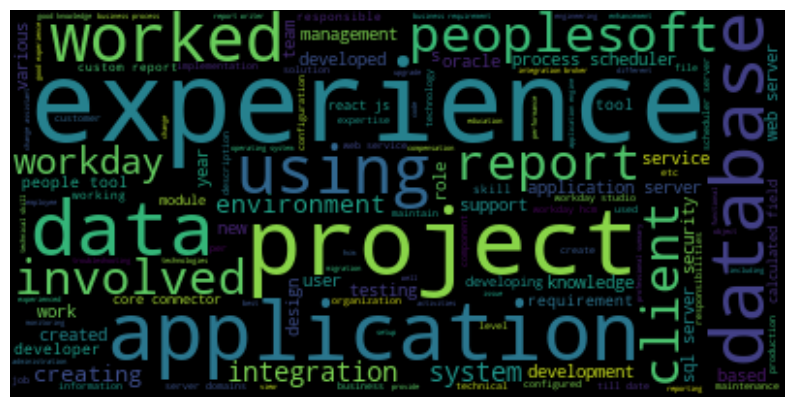

In [53]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
categories = np.sort(data['Category'].unique())
categories

array(['PeopleSoft resume', 'React JS Developer Resume',
       'SQL Developer Lightning Insight Resume', 'Workday Resume'],
      dtype=object)

In [55]:
data_categories = [data[data['Category'] == category].loc[:, ['Absolute_Clean_Resumes', 'Category']] for category in categories]
data_categories

[                               Absolute_Clean_Resumes           Category
 24  vinod akkala peoplesoft dba admin professional...  PeopleSoft resume
 25  peoplesoft admin varkala vikas career objectiv...  PeopleSoft resume
 26  peoplesoft adminpeoplesoft dba ganesh alladi c...  PeopleSoft resume
 27  peoplesoft administration vivekanand sayana ca...  PeopleSoft resume
 28  arun venu experience summary experience of yea...  PeopleSoft resume
 29  peoplesoft administrator srinivask experience ...  PeopleSoft resume
 30  sirazuddin m bangalore india sirazuddin m bang...  PeopleSoft resume
 31  g ananda rayudu g ananda rayudu profile summar...  PeopleSoft resume
 32  anubhav kumar singh core competencies scriptin...  PeopleSoft resume
 33  priyanka ramadoss mountpleasant coonoor the ni...  PeopleSoft resume
 34  classification internal classification interna...  PeopleSoft resume
 35  peoplesoft database administrator gangareddy p...  PeopleSoft resume
 36  c o n t a c t address manyata tec

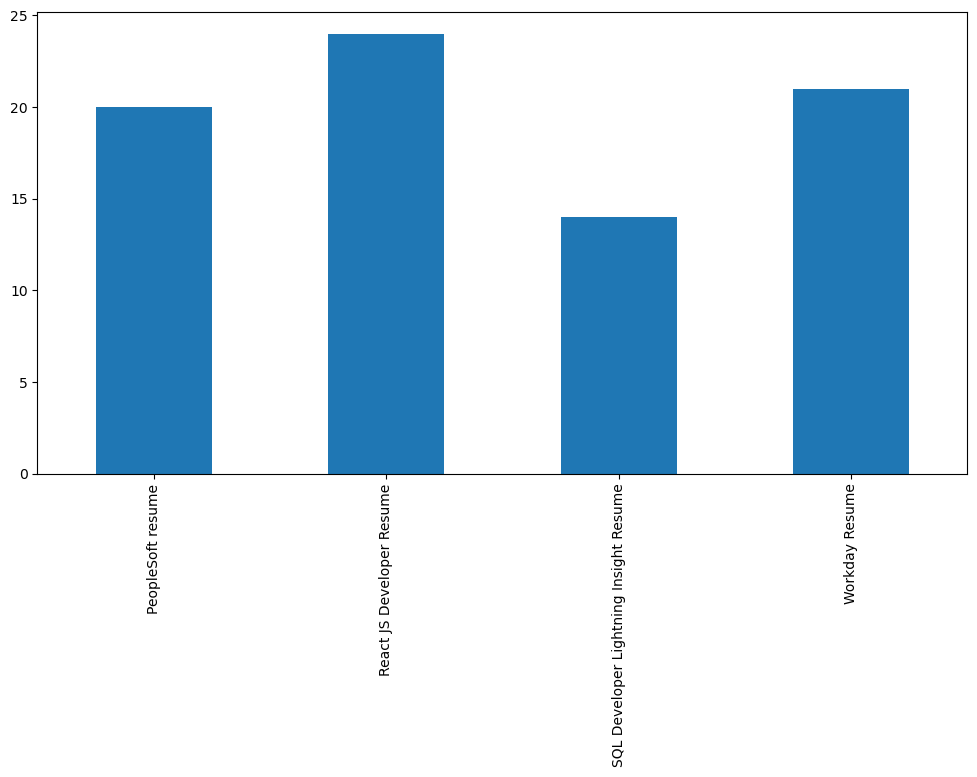

In [56]:
data['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [57]:
def wordcloud(df):
    txt = ' '.join(txt for txt in data['Absolute_Clean_Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

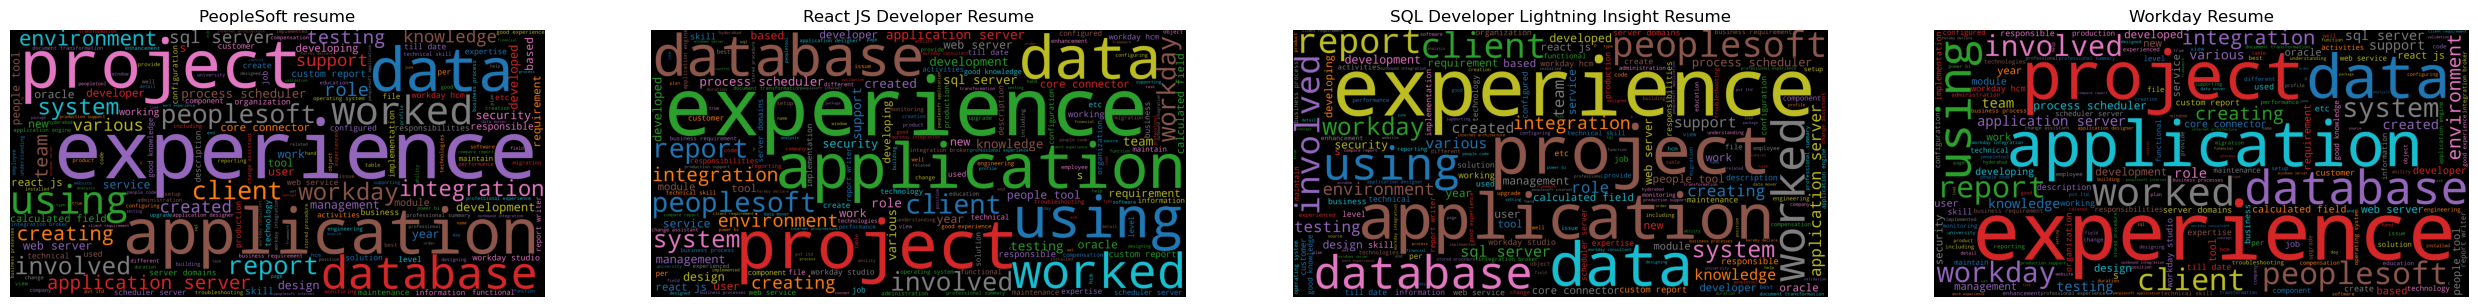

In [58]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline
plt.figure(figsize=(40, 28))

for i, category in enumerate(categories):
    wc = wordcloud(data_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()